In [1]:
%load_ext autoreload
%autoreload 2

# Imports and Functions

In [2]:
import json
import random
from pathlib import Path

import numpy as np
from chemFilters.img_render import MolGridPlotter
from QligFEP.restraints.restraint_setter import RestraintSetter
from rdkit.Chem.rdDepictor import Compute2DCoords


def render_restraints(rsetter, labelA, labelB, size=(300, 450), compute2D=False):
    plotter = MolGridPlotter(from_smi=False, add_atom_indices=True, size=size)
    mols = [(rsetter.molA.to_rdkit()), (rsetter.molB.to_rdkit())]
    if compute2D:
        [Compute2DCoords(m) for m in mols]
    matches = [
        np.array(rsetter.restraints.keys()),
        np.array(rsetter.restraints.values()),
    ]
    imgs = []
    imgs.append(
        plotter.render_mol(mols[0], label=labelA, highlightAtoms=matches[0].tolist())
    )
    imgs.append(
        plotter.render_mol(
            mols[1],
            label=labelB,
            highlightAtoms=matches[1].tolist(),
        )
    )
    img = plotter._images_to_grid(imgs, n_cols=2)
    return img, f"{labelA}_{labelB}"

[15:02:40] Initializing Normalizer


In [3]:
def get_restraint_renderings(
    lomap_dict,
    root_path,
    sample_size: int = 5,
    conserve_3D=True,
    size=(300, 450),
    ring_compare_method="element",
    strict_surround=False,
    ignore_surround_atom_type: bool = False,
):
    imgs = []
    labels = []
    edges = lomap_dict["edges"]
    if sample_size is None or sample_size <= 0 or sample_size >= len(edges):
        sampled_edges = edges
    else:
        random.seed(42)
        sampled_edges = random.sample(edges, sample_size)
    for edge in sampled_edges:
        ligA = edge["from"]
        ligB = edge["to"]
        ligA_path = root_path / f"{ligA}.sdf"
        ligB_path = root_path / f"{ligB}.sdf"
        rsetter = RestraintSetter(str(ligA_path), str(ligB_path))
        _ = rsetter.set_restraints(
            ring_compare_method=ring_compare_method,
            strict_surround=strict_surround,
            ignore_surround_atom_type=ignore_surround_atom_type,
        )
        img, label = render_restraints(
            rsetter, ligA, ligB, size=size, compute2D=(not conserve_3D)
        )
        imgs.append(img)
        labels.append(label)
    return imgs, labels


def display_imgs(imgs):
    for img in imgs:
        display(img)

# bace

In [8]:
target_name = 'bace'

root_path = Path(f"{target_name}/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs, labels = get_restraint_renderings(
    lomap_dict,
    root_path,
    sample_size=None,
    conserve_3D=True,
    ring_compare_method="hybridization",
    strict_surround=True,
    ignore_surround_atom_type=True,
)

img_root = Path().cwd().parent / f"imgs/{target_name}"
if not img_root.exists():
    img_root.mkdir(parents=True, exist_ok=True)

for img, label in zip(imgs, labels):
    img.save(img_root / f"restraint_{label}.png")

# bace_hunt

In [22]:
target_name = "bace_hunt"

root_path = Path(f"{target_name}/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs, labels = get_restraint_renderings(
    lomap_dict,
    root_path,
    sample_size=None,
    conserve_3D=True,
    ring_compare_method="hybridization",
    strict_surround=True,
    ignore_surround_atom_type=True,
)

img_root = Path().cwd().parent / f"imgs/{target_name}"
if not img_root.exists():
    img_root.mkdir(parents=True, exist_ok=True)

for img, label in zip(imgs, labels):
    img.save(img_root / f"restraint_{label}.png")

# bace_p2

In [23]:
target_name = "bace_p2"

root_path = Path(f"{target_name}/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs, labels = get_restraint_renderings(
    lomap_dict,
    root_path,
    sample_size=None,
    conserve_3D=True,
    ring_compare_method="hybridization",
    strict_surround=True,
    ignore_surround_atom_type=True,
)

img_root = Path().cwd().parent / f"imgs/{target_name}"
if not img_root.exists():
    img_root.mkdir(parents=True, exist_ok=True)

for img, label in zip(imgs, labels):
    img.save(img_root / f"restraint_{label}.png")

# cdk2

In [9]:
target_name = "cdk2"

root_path = Path(f"{target_name}/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs, labels = get_restraint_renderings(
    lomap_dict,
    root_path,
    sample_size=None,
    conserve_3D=True,
    ring_compare_method="hybridization",
    strict_surround=True,
    ignore_surround_atom_type=True,
)

img_root = Path().cwd().parent / f"imgs/{target_name}"
if not img_root.exists():
    img_root.mkdir(parents=True, exist_ok=True)

for img, label in zip(imgs, labels):
    img.save(img_root / f"restraint_{label}.png")

# cdk8

In [21]:
target_name = "cdk8"

root_path = Path(f"{target_name}/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs, labels = get_restraint_renderings(
    lomap_dict,
    root_path,
    sample_size=None,
    conserve_3D=True,
    ring_compare_method="hybridization",
    strict_surround=False,
    ignore_surround_atom_type=True,
)

img_root = Path().cwd().parent / f"imgs/{target_name}"
if not img_root.exists():
    img_root.mkdir(parents=True, exist_ok=True)

for img, label in zip(imgs, labels):
    img.save(img_root / f"restraint_{label}.png")

# cmet

In [11]:
target_name = "cmet"

root_path = Path(f"{target_name}/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs, labels = get_restraint_renderings(
    lomap_dict,
    root_path,
    sample_size=None,
    conserve_3D=True,
    ring_compare_method="hybridization",
    strict_surround=False,
    ignore_surround_atom_type=True,
)

img_root = Path().cwd().parent / f"imgs/{target_name}"
if not img_root.exists():
    img_root.mkdir(parents=True, exist_ok=True)

for img, label in zip(imgs, labels):
    img.save(img_root / f"restraint_{label}.png")

# eg5

Note: for this target, we should set `strict` to False

In [12]:
target_name = "eg5"

root_path = Path(f"{target_name}/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs, labels = get_restraint_renderings(
    lomap_dict,
    root_path,
    sample_size=None,
    conserve_3D=True,
    ring_compare_method="hybridization",
    strict_surround=False,
    ignore_surround_atom_type=False,
)

img_root = Path().cwd().parent / f"imgs/{target_name}"
if not img_root.exists():
    img_root.mkdir(parents=True, exist_ok=True)

for img, label in zip(imgs, labels):
    img.save(img_root / f"restraint_{label}.png")

# galectin

In [14]:
target_name = "galectin"

root_path = Path(f"{target_name}/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs, labels = get_restraint_renderings(
    lomap_dict,
    root_path,
    sample_size=None,
    conserve_3D=False,
    ring_compare_method="hybridization",
    strict_surround=True,
    ignore_surround_atom_type=True,
)

img_root = Path().cwd().parent / f"imgs/{target_name}"
if not img_root.exists():
    img_root.mkdir(parents=True, exist_ok=True)

for img, label in zip(imgs, labels):
    img.save(img_root / f"restraint_{label}.png")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

# hif2a

In [15]:
target_name = "hif2a"

root_path = Path(f"{target_name}/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs, labels = get_restraint_renderings(
    lomap_dict,
    root_path,
    sample_size=None,
    conserve_3D=True,
    ring_compare_method="hybridization",
    strict_surround=True,
    ignore_surround_atom_type=True,
)

img_root = Path().cwd().parent / f"imgs/{target_name}"
if not img_root.exists():
    img_root.mkdir(parents=True, exist_ok=True)

for img, label in zip(imgs, labels):
    img.save(img_root / f"restraint_{label}.png")

# jnk1

In [16]:
target_name = "jnk1"

root_path = Path(f"{target_name}/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs, labels = get_restraint_renderings(
    lomap_dict,
    root_path,
    sample_size=None,
    conserve_3D=True,
    ring_compare_method="hybridization",
    strict_surround=False,
    ignore_surround_atom_type=True,
)

img_root = Path().cwd().parent / f"imgs/{target_name}"
if not img_root.exists():
    img_root.mkdir(parents=True, exist_ok=True)

for img, label in zip(imgs, labels):
    img.save(img_root / f"restraint_{label}.png")

# mcl1

In [17]:
target_name = "mcl1"

root_path = Path(f"{target_name}/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs, labels = get_restraint_renderings(
    lomap_dict,
    root_path,
    sample_size=None,
    conserve_3D=True,
    ring_compare_method="hybridization",
    strict_surround=True,
    ignore_surround_atom_type=True,
)

img_root = Path().cwd().parent / f"imgs/{target_name}"
if not img_root.exists():
    img_root.mkdir(parents=True, exist_ok=True)

for img, label in zip(imgs, labels):
    img.save(img_root / f"restraint_{label}.png")

# p38

In [20]:
target_name = "p38"

root_path = Path(f"{target_name}/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs, labels = get_restraint_renderings(
    lomap_dict,
    root_path,
    sample_size=None,
    conserve_3D=True,
    ring_compare_method="element",
    strict_surround=False,
    ignore_surround_atom_type=False,
)

img_root = Path().cwd().parent / f"imgs/{target_name}"
if not img_root.exists():
    img_root.mkdir(parents=True, exist_ok=True)

for img, label in zip(imgs, labels):
    img.save(img_root / f"restraint_{label}.png")

# pde2

2024-07-16 13:01:36 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.4119595556066675
2024-07-16 13:01:36 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.5558512000932692
2024-07-16 13:01:36 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.4423629815707447
2024-07-16 13:01:37 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.44265068085624854
2024-07-16 13:01:37 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.5246951399311606


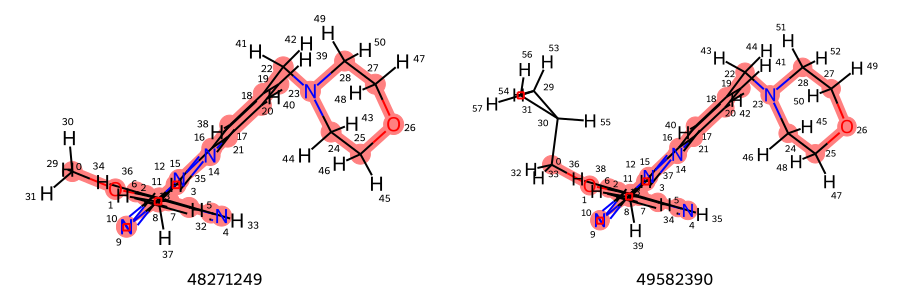

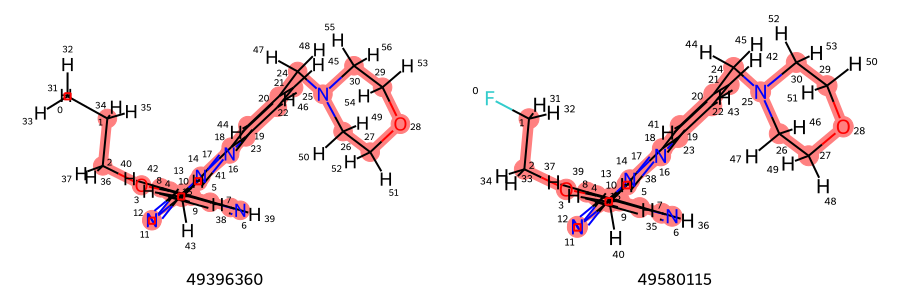

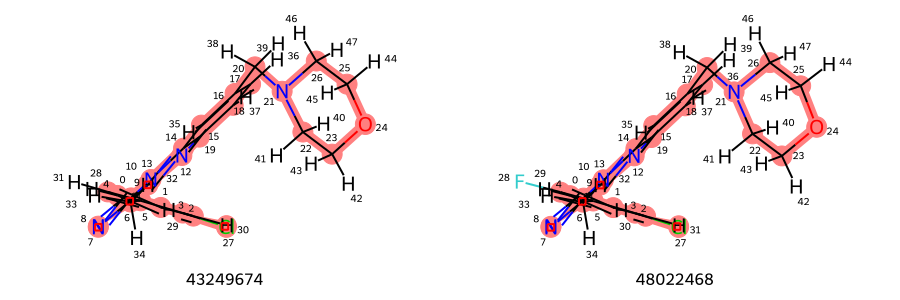

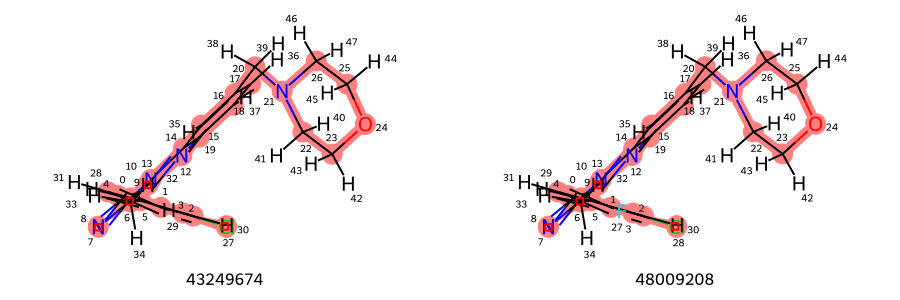

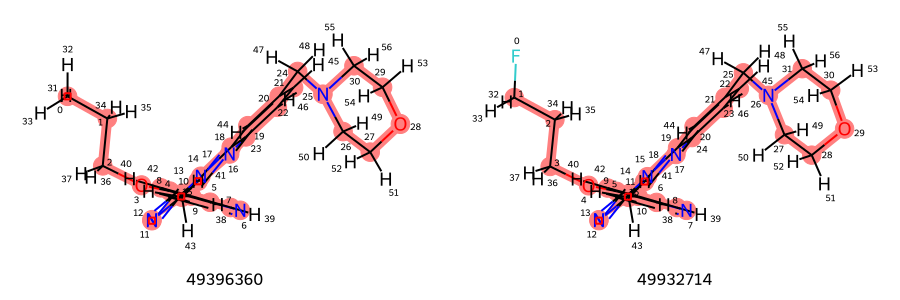

In [32]:
root_path = Path("pde2/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs = get_restraint_renderings(
    lomap_dict, root_path, size=(450, 300), conserve_3D=True
)
display_imgs(imgs)

# pde10

2024-07-16 13:07:41 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.30273648799537034
2024-07-16 13:07:41 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.2943688825857167
2024-07-16 13:07:41 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.31340805471516464
2024-07-16 13:07:41 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.30744178860549265
2024-07-16 13:07:41 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.4612594613128361


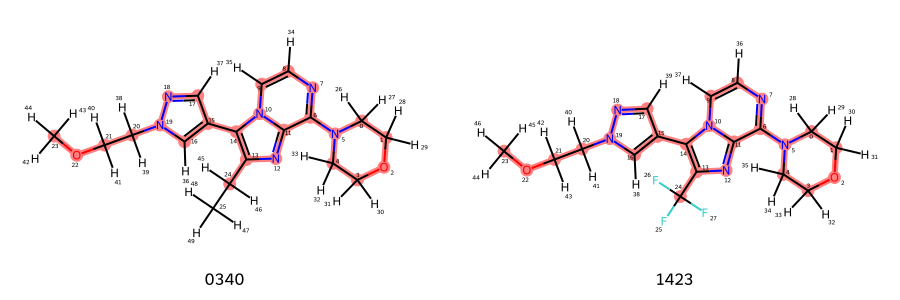

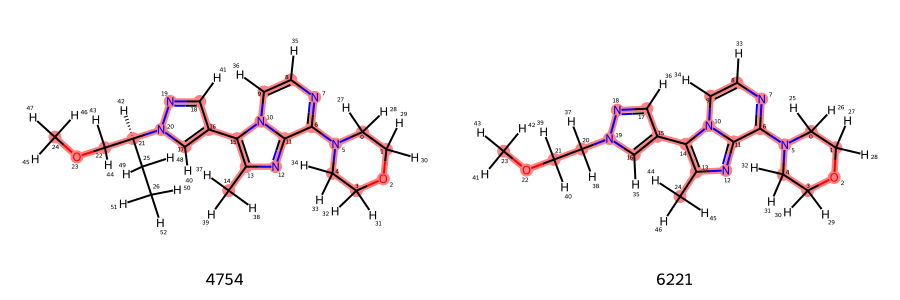

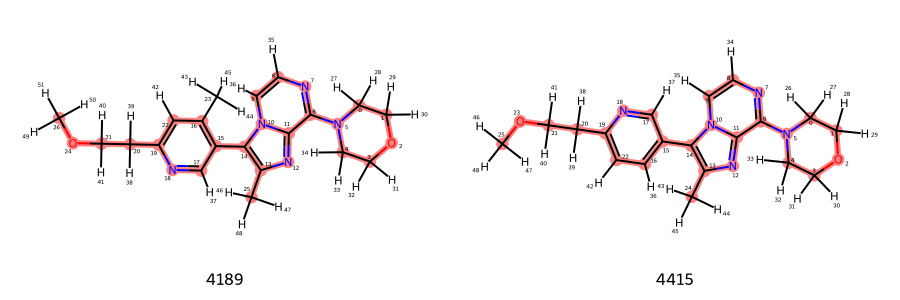

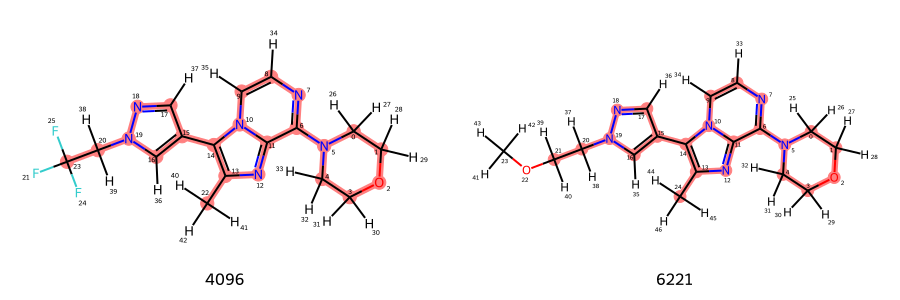

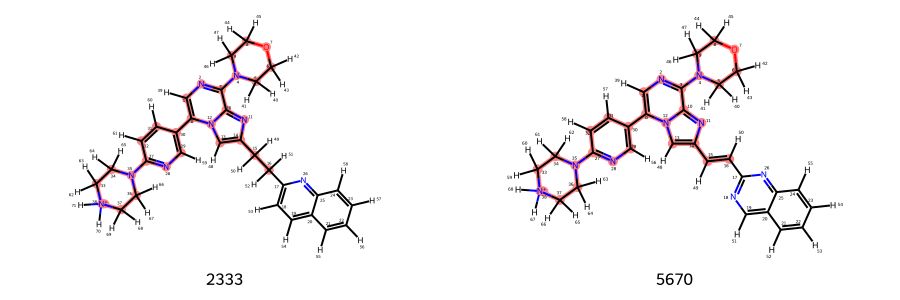

In [34]:
root_path = Path("pde10/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs = get_restraint_renderings(
    lomap_dict, root_path, size=(450, 300), conserve_3D=False
)
display_imgs(imgs)

# pfkfb3

2024-07-16 13:08:30 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.516035045639814
2024-07-16 13:08:30 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.5443474868571886
2024-07-16 13:08:30 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.4755419080726371
2024-07-16 13:08:30 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.570301369976531
2024-07-16 13:08:30 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.35042329347998624


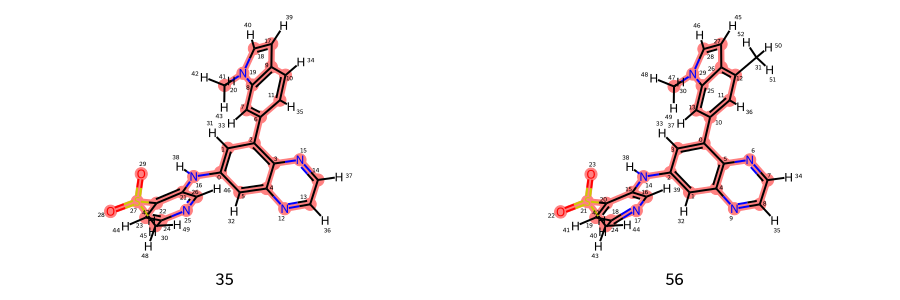

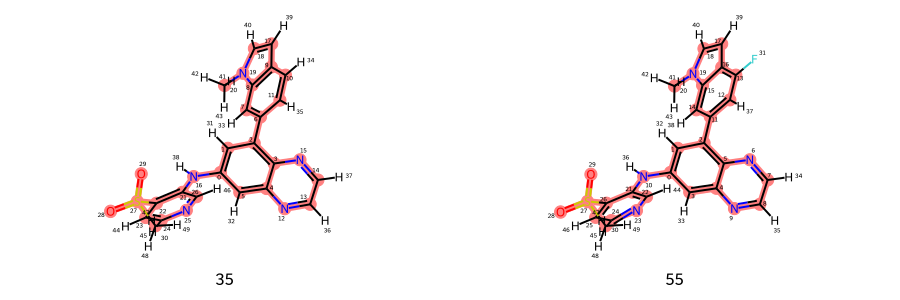

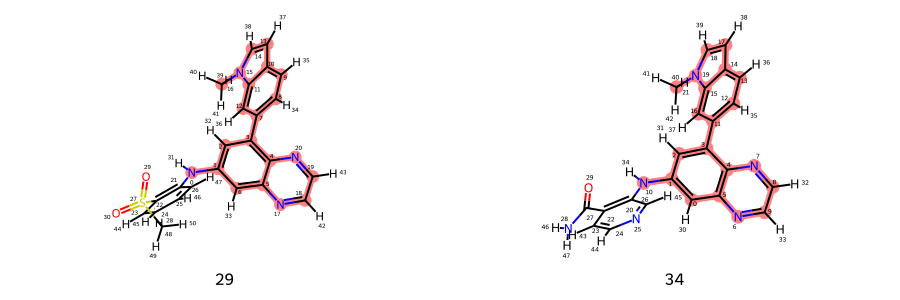

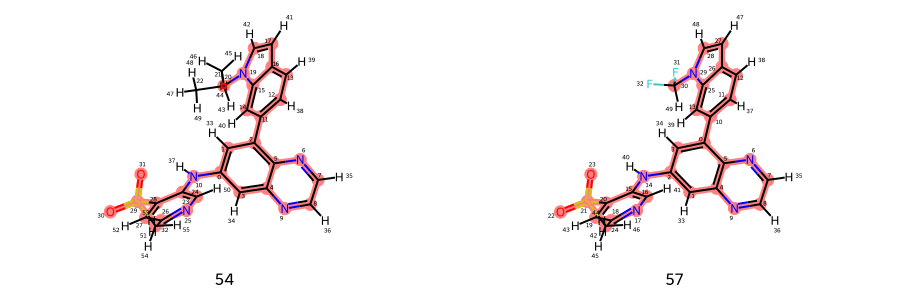

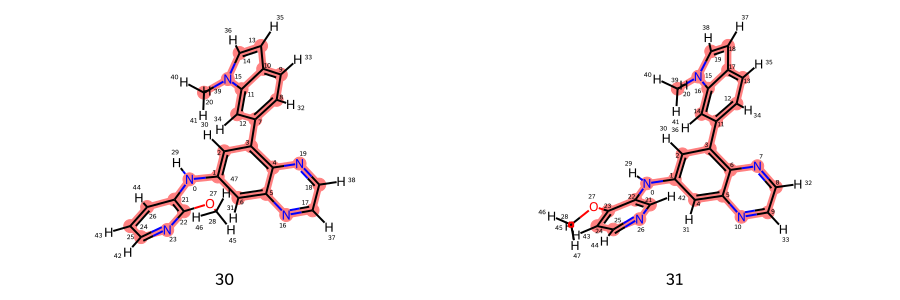

In [35]:
root_path = Path("pfkfb3/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs = get_restraint_renderings(
    lomap_dict, root_path, size=(450, 300), conserve_3D=True
)
display_imgs(imgs)

# ptp1b

2024-07-16 13:09:29 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.3586647615650347
2024-07-16 13:09:29 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.45967934497359436
2024-07-16 13:09:29 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.5430907374946767
2024-07-16 13:09:29 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.5376722204861066
2024-07-16 13:09:29 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.4857519079944873


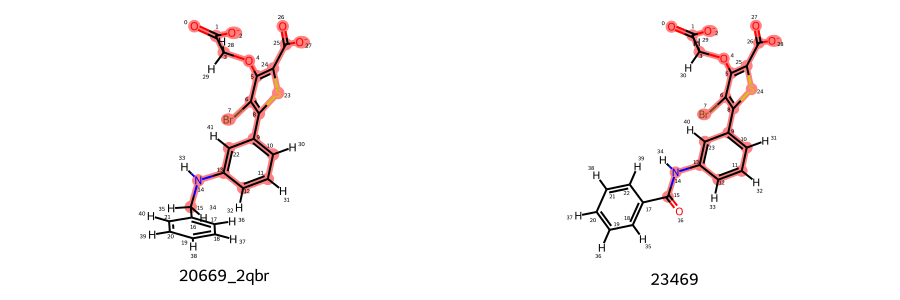

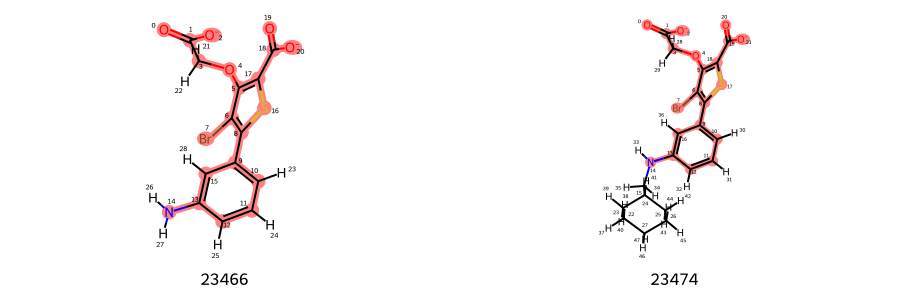

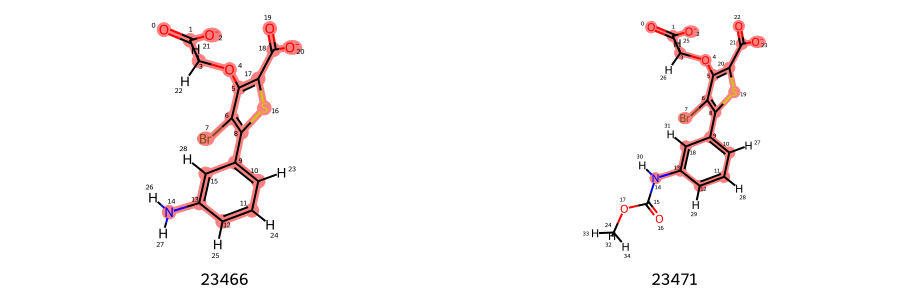

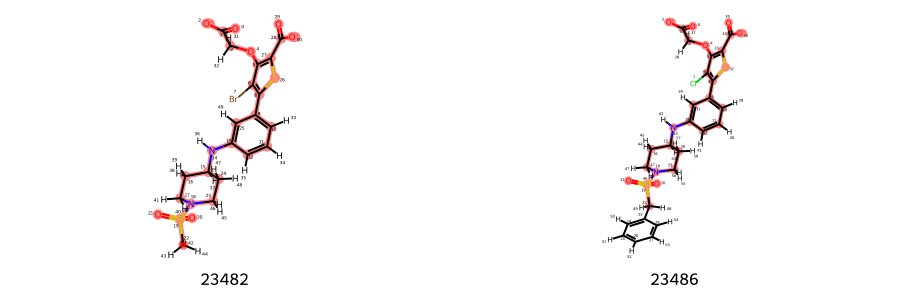

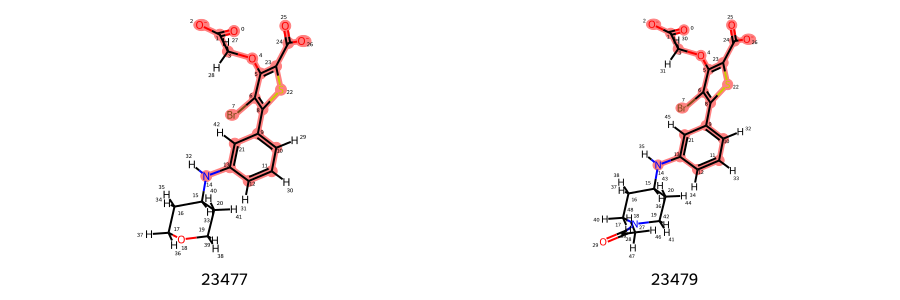

In [36]:
root_path = Path("ptp1b/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs = get_restraint_renderings(
    lomap_dict, root_path, size=(450, 300), conserve_3D=True
)
display_imgs(imgs)

# shp2

2024-07-16 13:09:55 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.46542010082325014
2024-07-16 13:09:55 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.39096572420453396
2024-07-16 13:09:55 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.39933583977712195
2024-07-16 13:09:55 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.39218185918651527
2024-07-16 13:09:55 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.12782242445875286


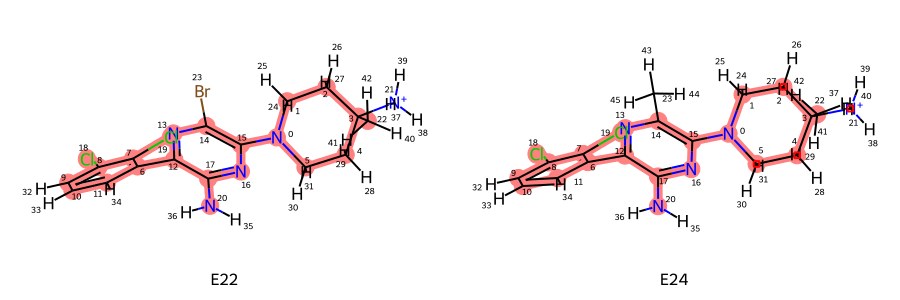

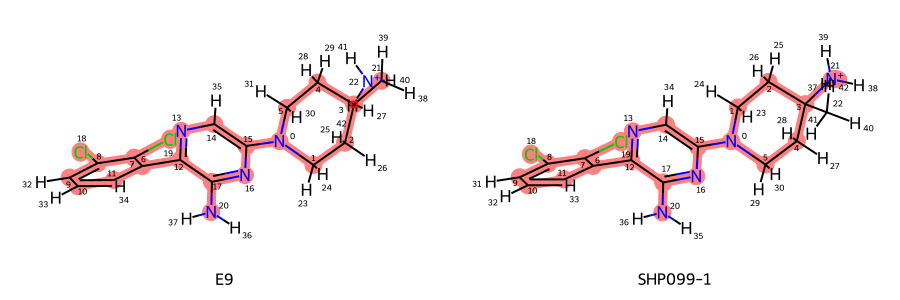

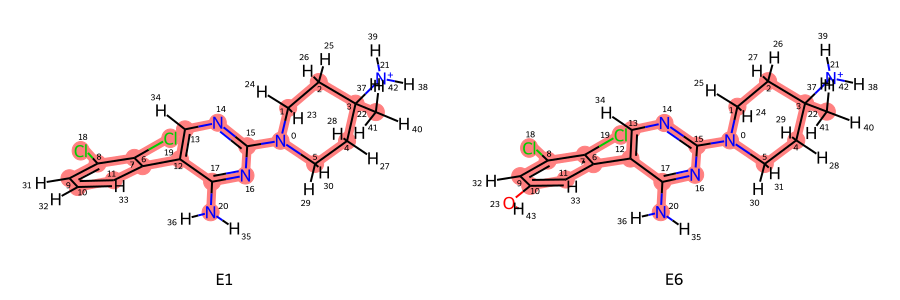

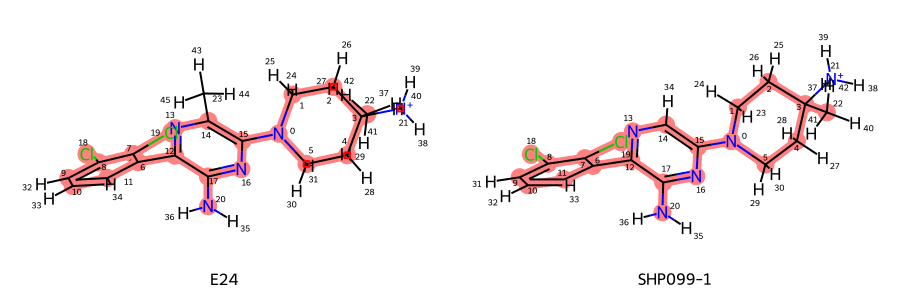

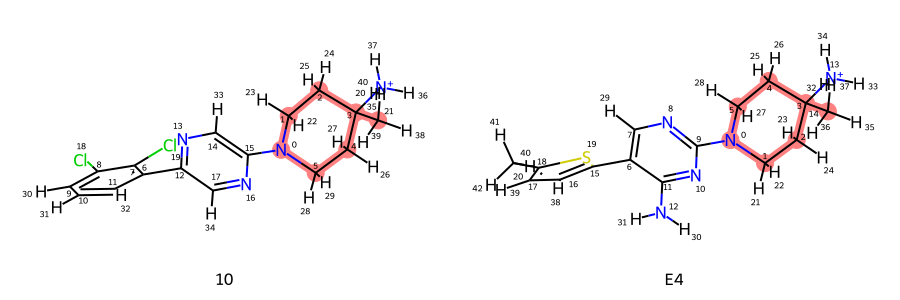

In [37]:
root_path = Path("shp2/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs = get_restraint_renderings(
    lomap_dict, root_path, size=(450, 300), conserve_3D=True
)
display_imgs(imgs)

# syk

2024-07-16 13:10:32 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.2314584402194248
2024-07-16 13:10:32 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.5688007457329913
2024-07-16 13:10:32 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.5669099247104793
2024-07-16 13:10:32 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.5595562249504118
2024-07-16 13:10:32 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.3222826253517632


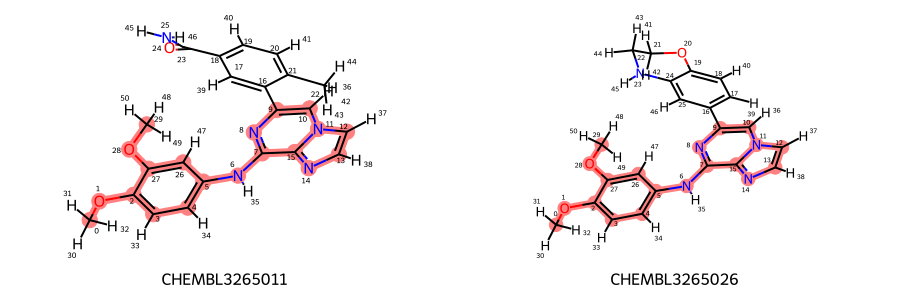

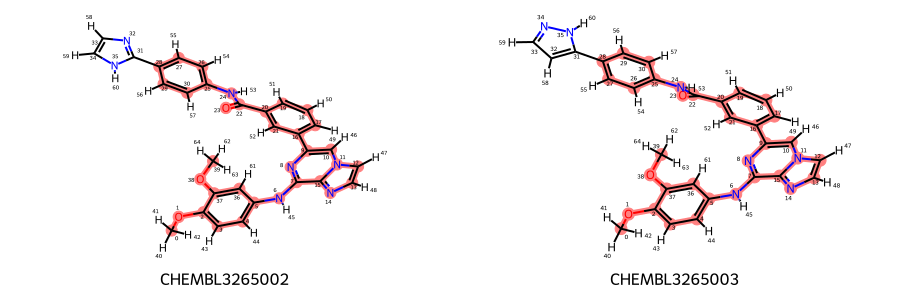

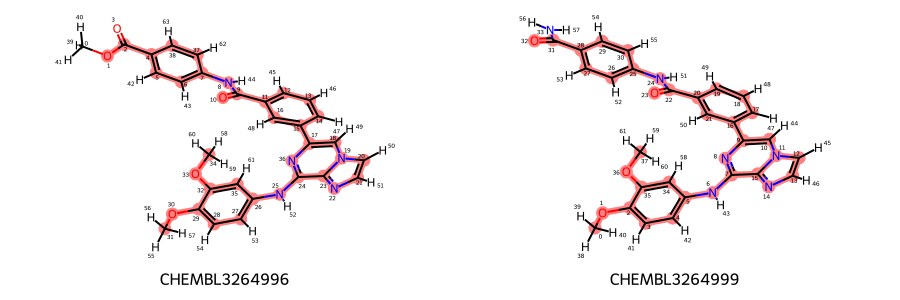

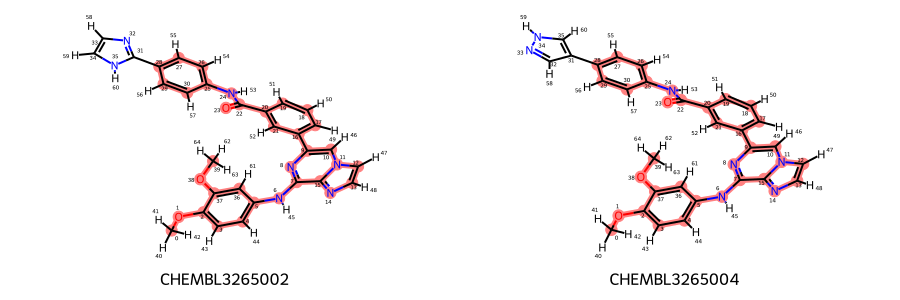

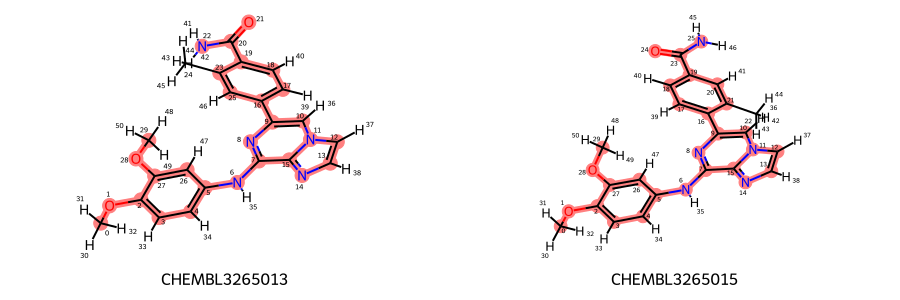

In [38]:
root_path = Path("syk/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs = get_restraint_renderings(
    lomap_dict, root_path, size=(450, 300), conserve_3D=True
)
display_imgs(imgs)

# thrombin

2024-07-16 14:10:58 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.4947306946458028
2024-07-16 14:10:58 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.4559106423451683
2024-07-16 14:10:58 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.48018782622825357
2024-07-16 14:10:58 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.49429044372534203
2024-07-16 14:10:58 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.4891770778871264


2024-07-16 14:10:58 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.41505506891922817
2024-07-16 14:10:59 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.5060076260962538
2024-07-16 14:10:59 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.45112340290089625
2024-07-16 14:10:59 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.45857249123613897
2024-07-16 14:10:59 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.42563622398908757
2024-07-16 14:10:59 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.4851509615362446
2024-07-16 14:10:59 | INFO     | QligFEP.restraints.restraint_setter:_al

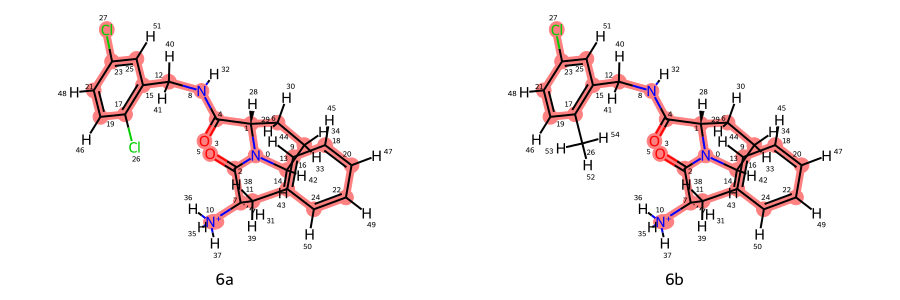

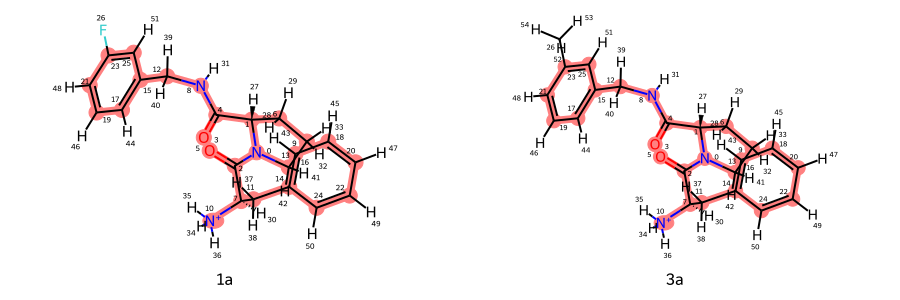

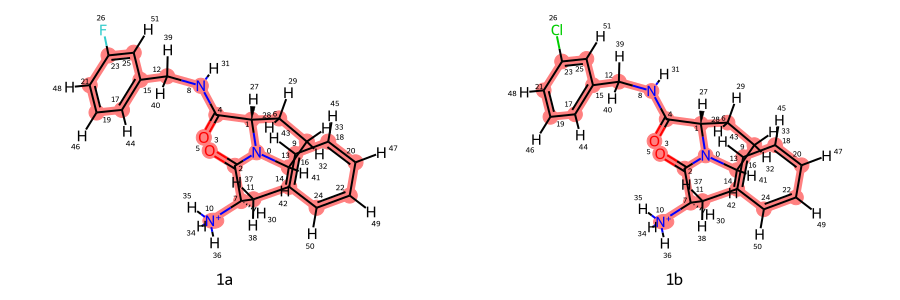

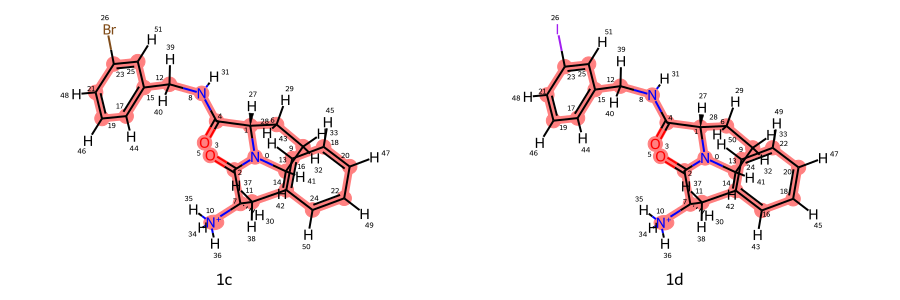

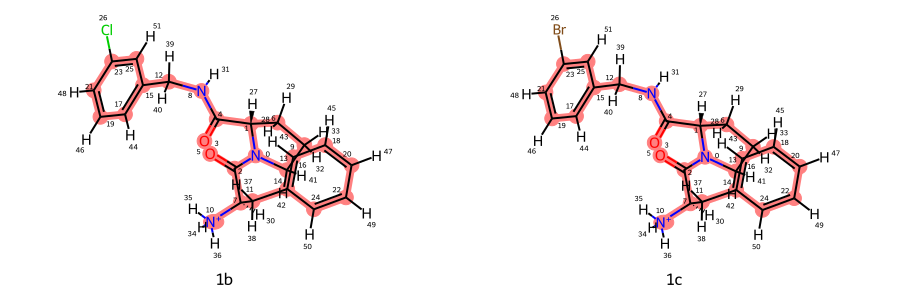

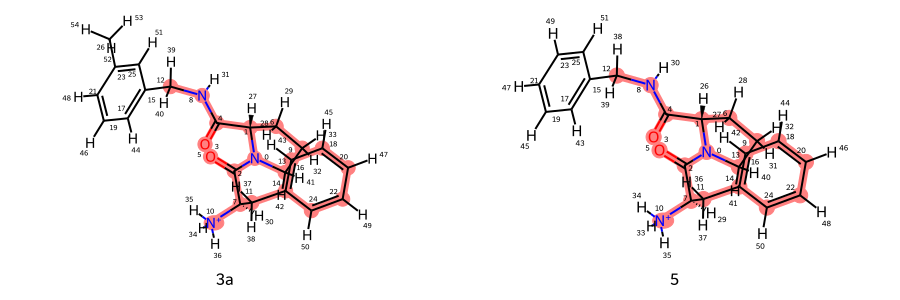

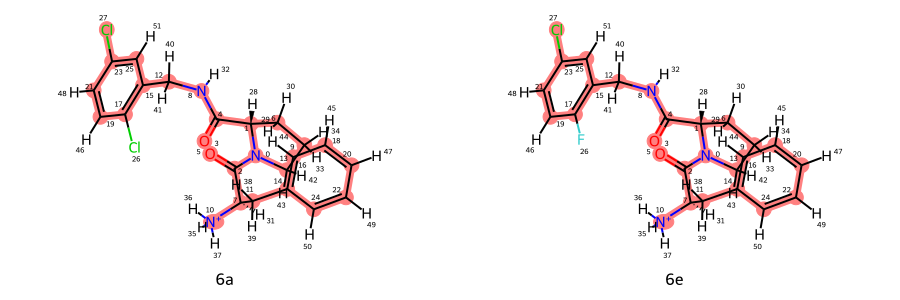

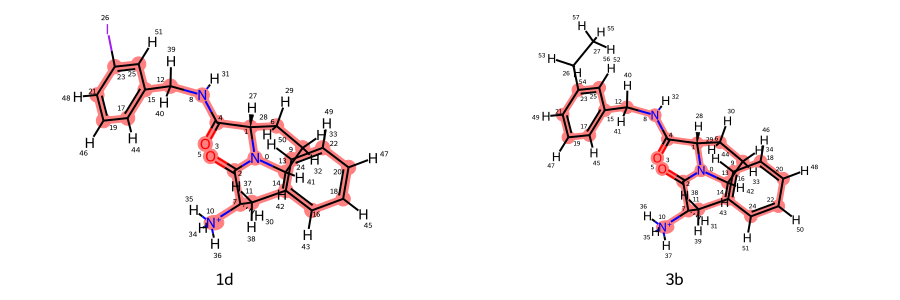

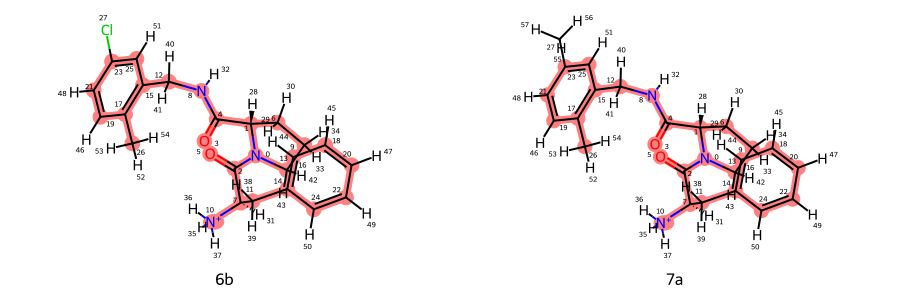

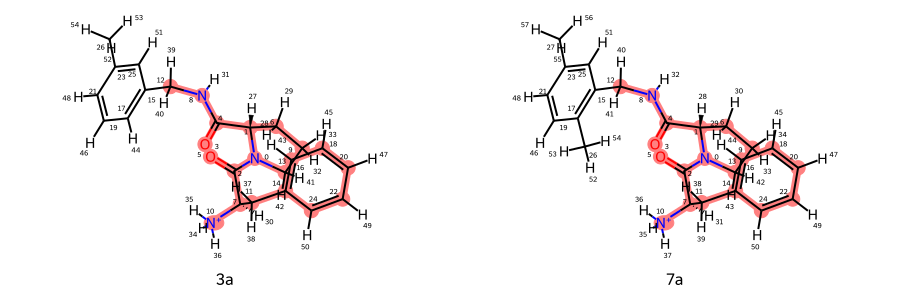

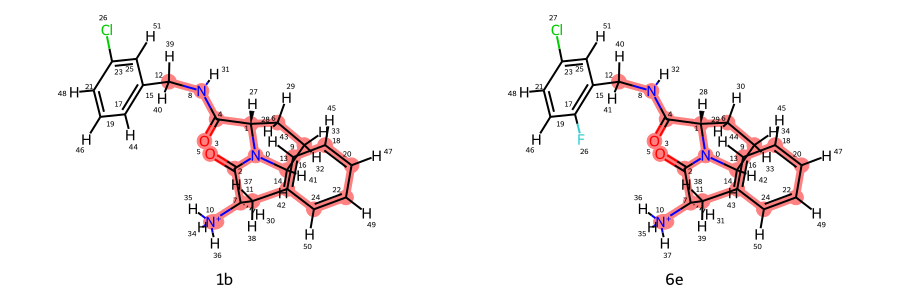

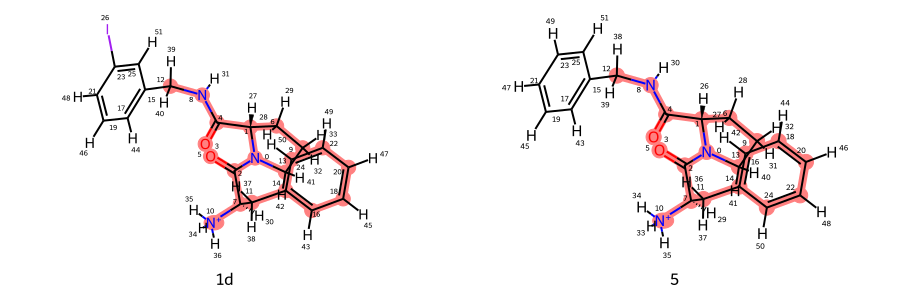

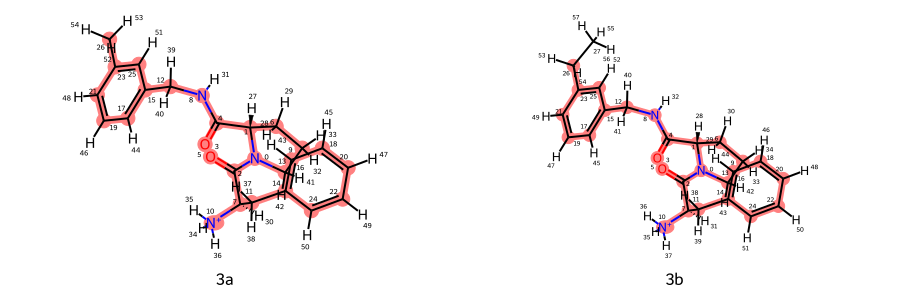

In [4]:
root_path = Path("thrombin/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs = get_restraint_renderings(
    lomap_dict,
    root_path,
    size=(450, 300),
    conserve_3D=True,
    sample_size=None,
    strict_surround=True,
    ignore_surround_atom_type=True,
)
display_imgs(imgs)

# tnks2

2024-07-16 13:42:18 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.34167593562456
2024-07-16 13:42:18 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.31347518951185405
2024-07-16 13:42:18 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.34311158387422075
2024-07-16 13:42:18 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.3653068720630799
2024-07-16 13:42:18 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.0419375646897356


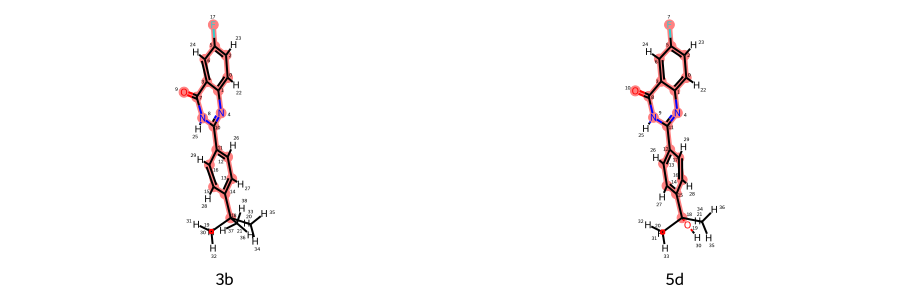

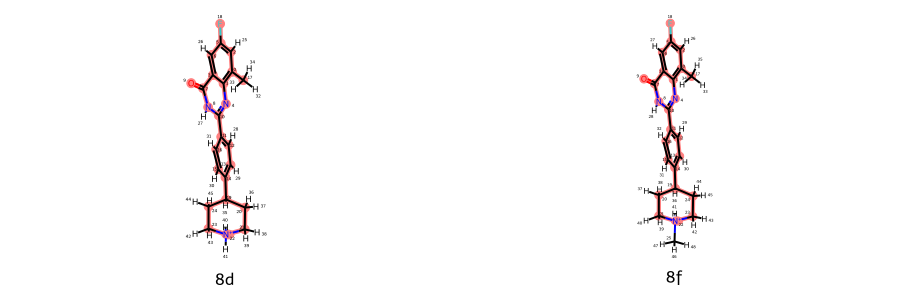

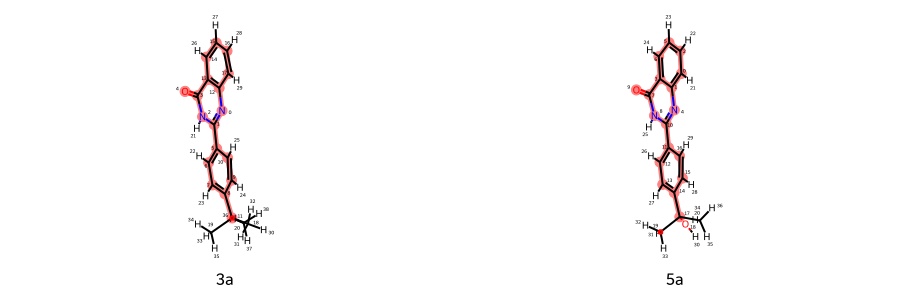

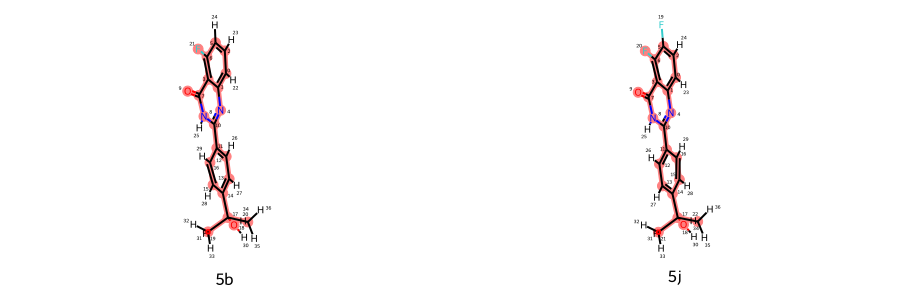

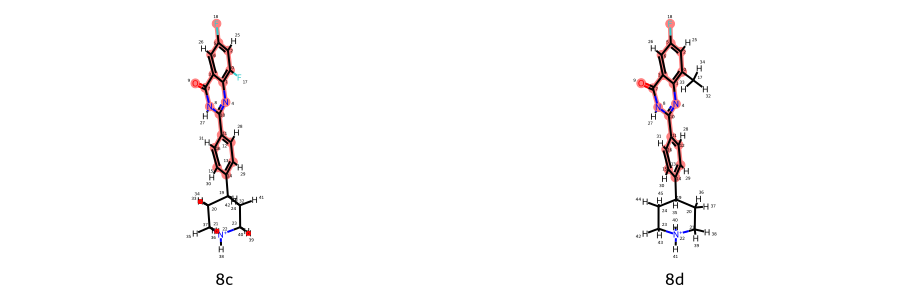

In [48]:
root_path = Path("tnks2/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs = get_restraint_renderings(
    lomap_dict,
    root_path,
    size=(450, 300),
    conserve_3D=True,
    sample_size=5,
    strict_surround=False,
)
display_imgs(imgs)

# tyk2

2024-07-16 13:43:51 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.43563887334985535
2024-07-16 13:43:51 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.5011862902915722
2024-07-16 13:43:51 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.5569533582083421
2024-07-16 13:43:51 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.5826166616870356


2024-07-16 13:43:51 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.4780009294790851


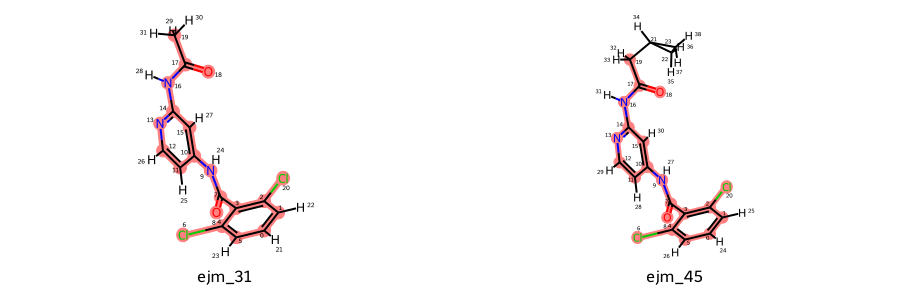

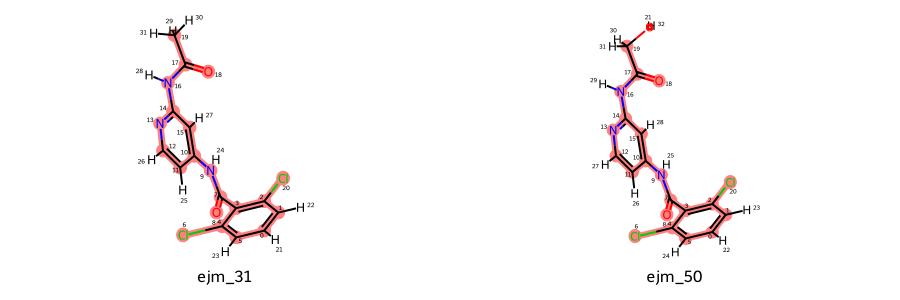

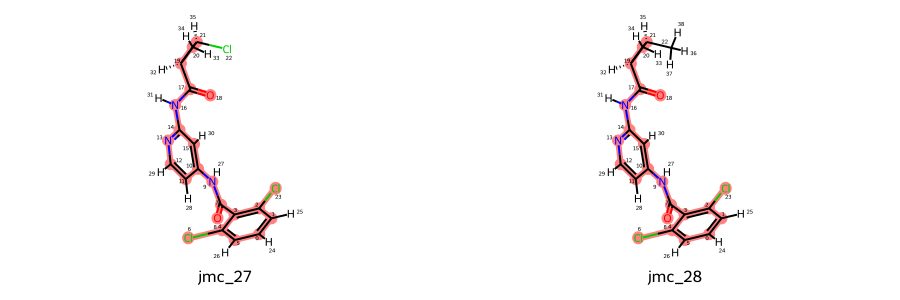

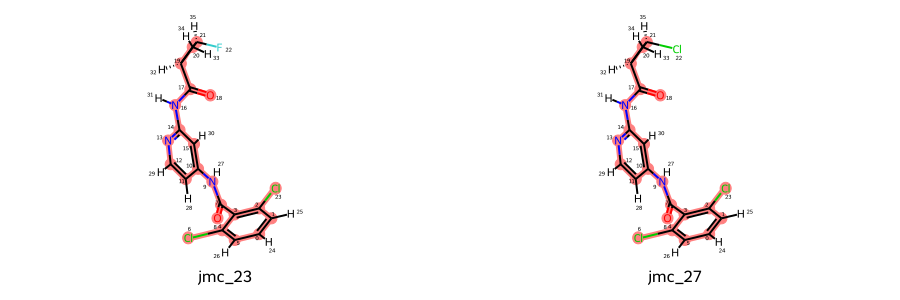

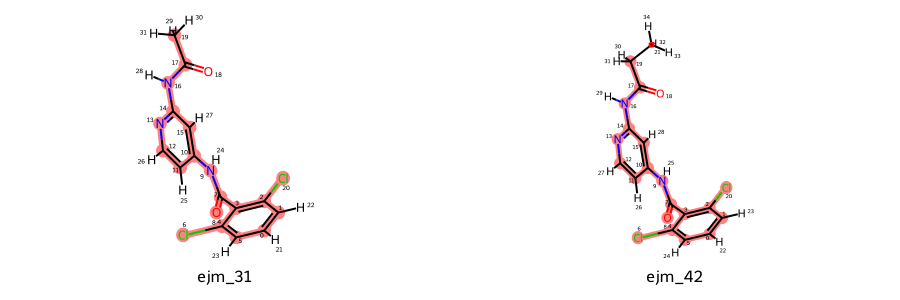

In [50]:
root_path = Path("tyk2/ligands/ligands")
lomap_path = root_path / "lomap.json"
lomap_dict = json.load(open(lomap_path, "r"))

imgs = get_restraint_renderings(
    lomap_dict,
    root_path,
    size=(450, 300),
    conserve_3D=True,
    sample_size=5,
    strict_surround=False,
)
display_imgs(imgs)

2024-07-16 16:10:39 | INFO     | QligFEP.restraints.restraint_setter:_align_and_map_molecules:61 - Volume ratio score between ligands: 0.40220506064677974


here we go


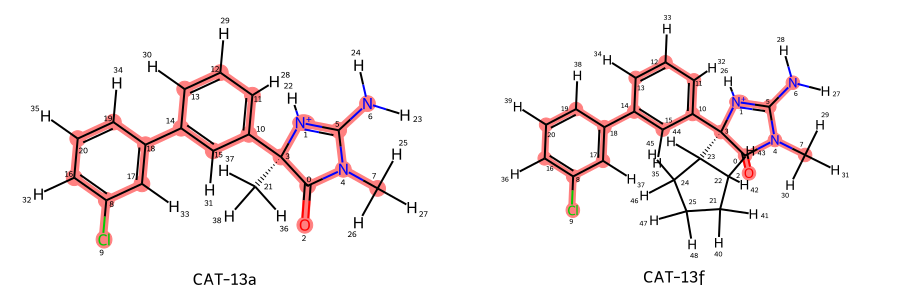

In [49]:
root_path = Path("bace/ligands/ligands")
rsetter = RestraintSetter(root_path / "CAT-13a.sdf", root_path / "CAT-13f.sdf")
restraints = rsetter.set_restraints(strict=True, ignore_substituent_atom_type=True)

display(
    render_restraints(rsetter, "CAT-13a", "CAT-13f", compute2D=True, size=(450, 300))
)